In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [607]:
# Old file
# home_audio = pd.read_csv('C:/Data Science/Capstone Project/Model Files/HomeAudio.csv')

home_audio = pd.read_csv('C:/Data Science/Capstone Project/HomeAudio.csv')
home_audio.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [608]:
home_audio = home_audio.drop(['Unnamed: 0'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [609]:
# Drop lag, MA and GMV columns
home_audio = home_audio.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [610]:
home_audio = home_audio.drop(['order_id', 'order_item_id'], axis=1)
home_audio.head()

,order_date,Year,Month,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-03,2015,10,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-16,2015,10,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-16,2015,10,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-16,2015,10,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-20,2015,10,"6,850.00",1,0,0,COD,9,EntertainmentSmall,...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


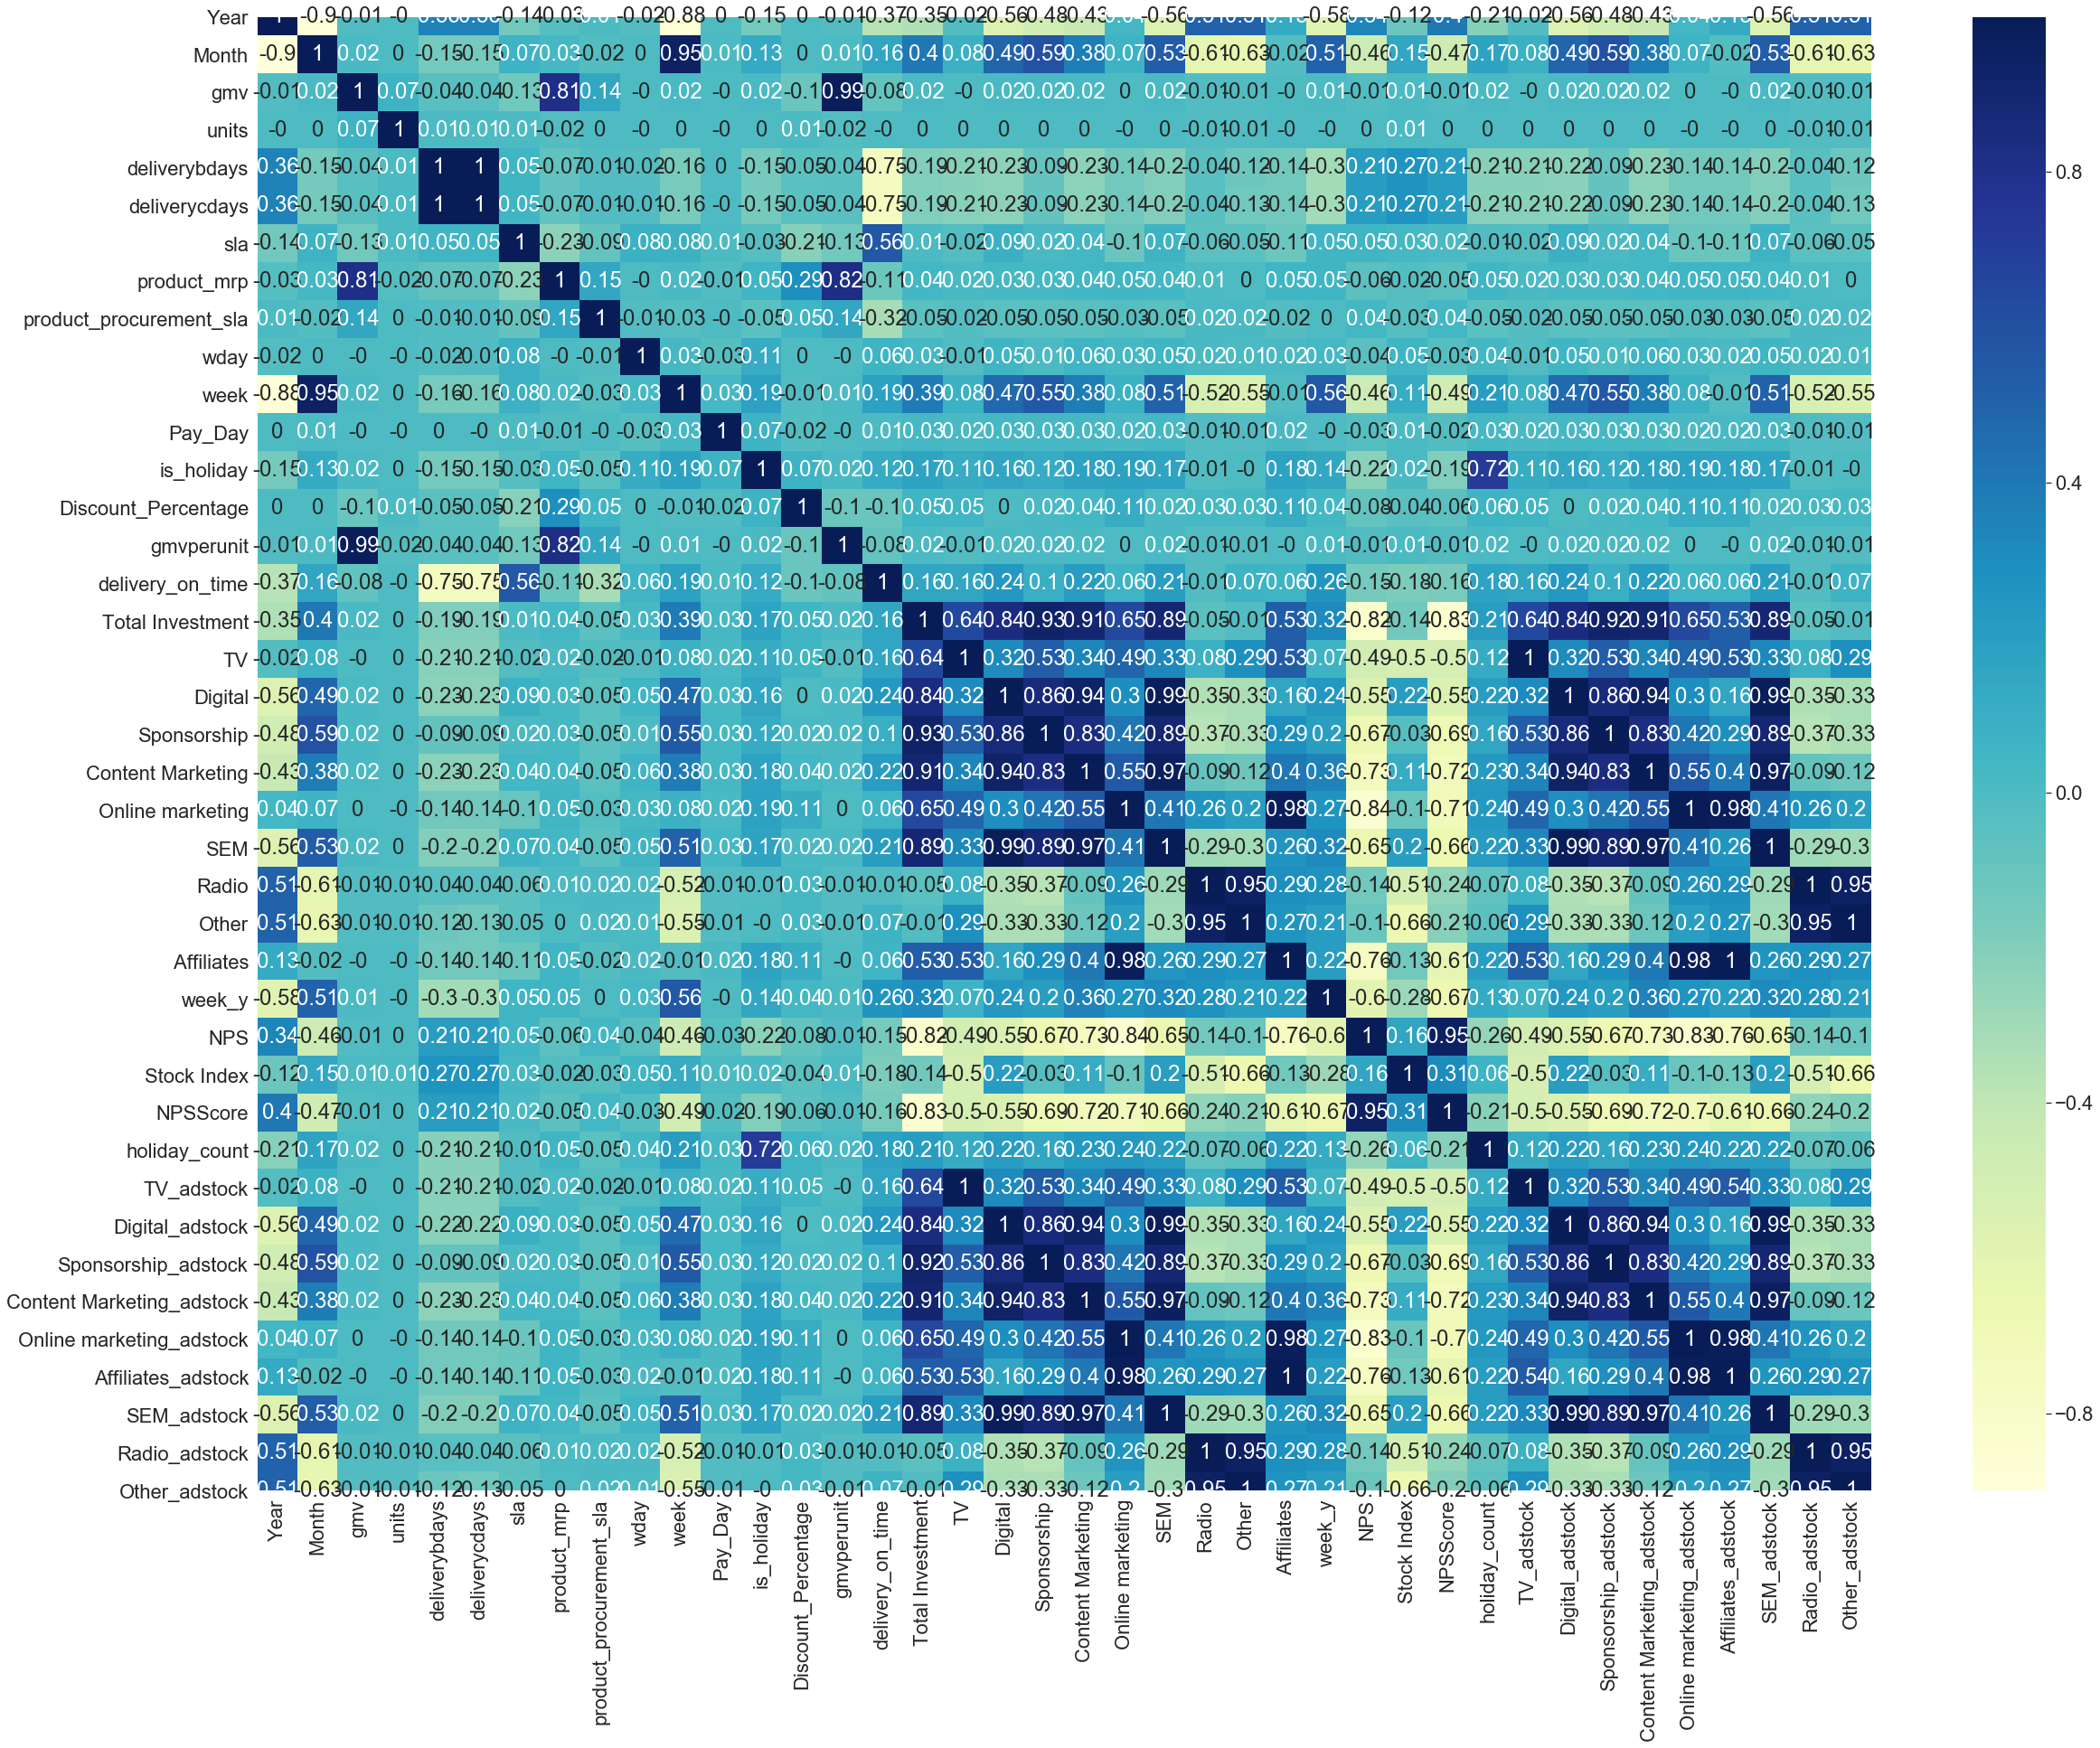

In [556]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(home_audio.corr(), 2), annot=True, cmap="YlGnBu")

In [611]:
home_audio = home_audio.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

# Doubtful
# product_mrp
home_audio.head()

,order_date,Year,Month,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,...,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count,ItemType,month_date
0,2015-10-03,2015,10,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury,2015-10-03-10
1,2015-10-16,2015,10,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury,2015-10-16-10
2,2015-10-16,2015,10,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury,2015-10-16-10
3,2015-10-16,2015,10,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury,2015-10-16-10
4,2015-10-20,2015,10,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury,2015-10-20-10


In [612]:
home_audio = home_audio.drop('order_date', axis=1)
home_audio

,Year,Month,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,...,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count,ItemType,month_date
0,2015,10,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury,2015-10-03-10
1,2015,10,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury,2015-10-16-10
2,2015,10,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury,2015-10-16-10
3,2015,10,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury,2015-10-16-10
4,2015,10,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury,2015-10-20-10
5,2015,10,"6,850.00",1,0,Prepaid,4,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury,2015-10-30-10
6,2015,10,"6,099.00",1,0,COD,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury,2015-10-11-10
7,2015,10,"6,099.00",1,0,COD,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury,2015-10-14-10
8,2015,10,"6,850.00",1,0,Prepaid,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury,2015-10-30-10
9,2015,10,"6,883.00",1,0,Prepaid,4,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury,2015-10-10-10


In [613]:
home_audio = home_audio.drop(['month_date', 'week_y', 'wday'], axis=1)
# delivery_on_time, delivery_status
home_audio.head()

,Year,Month,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType
0,2015,10,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury
1,2015,10,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury
2,2015,10,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury
3,2015,10,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury
4,2015,10,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury


In [614]:
home_audio.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [615]:
home_audio.columns

Index(['Year', 'Month', 'gmv', 'units', 'deliverycdays',
       's1_fact_order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'week', 'Pay_Day',
       'is_holiday', 'special_sale', 'Discount_Percentage', 'delivery_on_time',
       'delivery_status', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'SEM', 'Radio', 'Other',
       'Affiliates', 'NPS', 'Stock Index', 'NPSScore', 'holiday_count',
       'ItemType'],
      dtype='object')

In [616]:
home_audio.dtypes

Year                               int64
Month                              int64
gmv                              float64
units                              int64
deliverycdays                      int64
s1_fact_order_payment_type        object
sla                                int64
product_analytic_category         object
product_analytic_sub_category     object
product_analytic_vertical         object
product_mrp                      float64
product_procurement_sla            int64
week                               int64
Pay_Day                            int64
is_holiday                         int64
special_sale                      object
Discount_Percentage              float64
delivery_on_time                 float64
delivery_status                   object
Total Investment                 float64
TV                               float64
Digital                          float64
Sponsorship                      float64
Content Marketing                float64
Online marketing

In [617]:
home_audio['delivery_on_time'].unique()

array([  0.,  -3.,   4.,  -2.,  -1.,   1.,   5.,   2.,   3.,   6.,   9.,
        11.,  10.,   8.,   7.,  13.,  -4.,  12., -11.,  15.,  14.,  -5.,
       -13.,  40., -31.,  17.,  18.,  16.,  -8.,  22.,  -9.,  21.,  23.,
        -7., -21.,  -6., -12., -10., -20., -15., -19.,  20., -18., -29.,
       -14., -17., -16., -23.,  24., -22., -38., -28., -37., -45., -30.,
       -32., -26., -24., -34.,  19., -27., -41., -46., -25.])

In [618]:
home_audio=home_audio.loc[(home_audio['delivery_on_time']>0)]
home_audio.head()

,Year,Month,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType
2,2015,10,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury
4,2015,10,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury
8,2015,10,"6,850.00",1,0,Prepaid,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury
11,2015,10,"6,700.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury
12,2015,10,"6,900.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury


In [619]:
log_cols = home_audio.select_dtypes(['float64','int64']).columns

In [620]:
home_audio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 34 columns):
Year                             62116 non-null int64
Month                            62116 non-null int64
gmv                              62116 non-null float64
units                            62116 non-null int64
deliverycdays                    62116 non-null int64
s1_fact_order_payment_type       62116 non-null object
sla                              62116 non-null int64
product_analytic_category        62116 non-null object
product_analytic_sub_category    62116 non-null object
product_analytic_vertical        62116 non-null object
product_mrp                      62116 non-null float64
product_procurement_sla          62116 non-null int64
week                             62116 non-null int64
Pay_Day                          62116 non-null int64
is_holiday                       62116 non-null int64
special_sale                     62116 non-null object
Discount_Percentag

In [621]:
log_cols = list(set(log_cols)-
                set(['Year','Month', 'gmv','units', 'week']))

In [622]:
home_audio[log_cols].lt(0).sum()

NPS                        0
Stock Index                0
deliverycdays              0
Total Investment           0
Affiliates                 0
holiday_count              0
SEM                        0
sla                        0
Pay_Day                    0
Sponsorship                0
Digital                    0
product_mrp                0
NPSScore                   0
Discount_Percentage        0
product_procurement_sla    0
Other                      0
Online marketing           0
TV                         0
Radio                      0
is_holiday                 0
Content Marketing          0
delivery_on_time           0
dtype: int64

In [623]:
home_audio[log_cols].eq(0).sum()

NPS                            0
Stock Index                    0
deliverycdays              61962
Total Investment               0
Affiliates                     0
holiday_count              33895
SEM                            0
sla                            0
Pay_Day                    58013
Sponsorship                    0
Digital                        0
product_mrp                    0
NPSScore                       0
Discount_Percentage          629
product_procurement_sla     1177
Other                      45597
Online marketing               0
TV                             0
Radio                      45597
is_holiday                 47056
Content Marketing              0
delivery_on_time               0
dtype: int64

In [624]:
# We will add 1 to all columns before we take log. This will make any value between 0 and 1 (like percentages) > 1
# This is done to avoid negatives in the columns as the log of numbers between 0 and 1 would be less than 

home_audio[log_cols]+=1

In [625]:
# Transforming relevant columns to logs
home_audio[log_cols] =np.log(home_audio[log_cols])

In [626]:
home_audio.head()

,Year,Month,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType
2,2015,10,"6,255.00",1,0.00,Prepaid,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61,Luxury
4,2015,10,"6,850.00",1,0.00,COD,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury
8,2015,10,"6,850.00",1,0.00,Prepaid,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury
11,2015,10,"6,700.00",1,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61,Luxury
12,2015,10,"6,900.00",1,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury


In [627]:
home_audio = home_audio.drop(['Year', 'Month'], axis=1)
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType
2,"6,255.00",1,0.00,Prepaid,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61,Luxury
4,"6,850.00",1,0.00,COD,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury
8,"6,850.00",1,0.00,Prepaid,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury
11,"6,700.00",1,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61,Luxury
12,"6,900.00",1,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury


In [628]:
home_audio = home_audio.drop('week', axis=1)
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType
2,"6,255.00",1,0.00,Prepaid,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61,Luxury
4,"6,850.00",1,0.00,COD,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury
8,"6,850.00",1,0.00,Prepaid,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury
11,"6,700.00",1,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61,Luxury
12,"6,900.00",1,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,1.79,...,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00,Luxury


### Creating dummies

In [629]:
# Subset all categorical variables
home_audio_categorical = home_audio.select_dtypes(include=['object'])
home_audio_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
2,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
4,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
8,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
11,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
12,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury


In [630]:
# Subset all numerical variables
home_audio_numerical = home_audio.select_dtypes(include=['int64','float64'])
home_audio_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count
2,"6,255.00",1,0.00,2.30,8.92,1.79,0.00,0.69,2.87,1.61,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61
4,"6,850.00",1,0.00,2.30,8.92,1.79,0.00,0.00,2.27,1.61,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00
8,"6,850.00",1,0.00,1.95,8.92,1.79,0.00,0.00,2.27,0.69,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00
11,"6,700.00",1,0.00,1.95,8.92,1.79,0.00,0.69,2.46,0.69,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61
12,"6,900.00",1,0.00,1.95,8.92,1.79,0.00,0.00,2.20,0.69,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00


In [631]:
# Convert into dummies
dummies = pd.get_dummies(home_audio_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [632]:
# Drop categorical variable columns
home_audio = home_audio.drop(list(home_audio_categorical.columns), axis=1)

In [633]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count
2,"6,255.00",1,0.00,2.30,8.92,1.79,0.00,0.69,2.87,1.61,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61
4,"6,850.00",1,0.00,2.30,8.92,1.79,0.00,0.00,2.27,1.61,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00
8,"6,850.00",1,0.00,1.95,8.92,1.79,0.00,0.00,2.27,0.69,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00
11,"6,700.00",1,0.00,1.95,8.92,1.79,0.00,0.69,2.46,0.69,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,1.61
12,"6,900.00",1,0.00,1.95,8.92,1.79,0.00,0.00,2.20,0.69,...,15.87,17.82,18.09,0.00,0.00,16.57,3.82,7.10,2.40,0.00


In [634]:
# Concatenate dummy variables with X
home_audio = pd.concat([home_audio, dummies], axis=1)
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0.00,2.30,8.92,1.79,0.00,0.69,2.87,1.61,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0.00,2.30,8.92,1.79,0.00,0.00,2.27,1.61,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0.00,1.95,8.92,1.79,0.00,0.00,2.27,0.69,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0.00,1.95,8.92,1.79,0.00,0.69,2.46,0.69,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0.00,1.95,8.92,1.79,0.00,0.00,2.20,0.69,...,0,0,0,0,0,0,1,0,0,0


In [635]:
home_audio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 46 columns):
gmv                                           62116 non-null float64
units                                         62116 non-null int64
deliverycdays                                 62116 non-null float64
sla                                           62116 non-null float64
product_mrp                                   62116 non-null float64
product_procurement_sla                       62116 non-null float64
Pay_Day                                       62116 non-null float64
is_holiday                                    62116 non-null float64
Discount_Percentage                           62116 non-null float64
delivery_on_time                              62116 non-null float64
Total Investment                              62116 non-null float64
TV                                            62116 non-null float64
Digital                                       62116 non-null floa

In [639]:
home_audio.shape

(62116, 46)

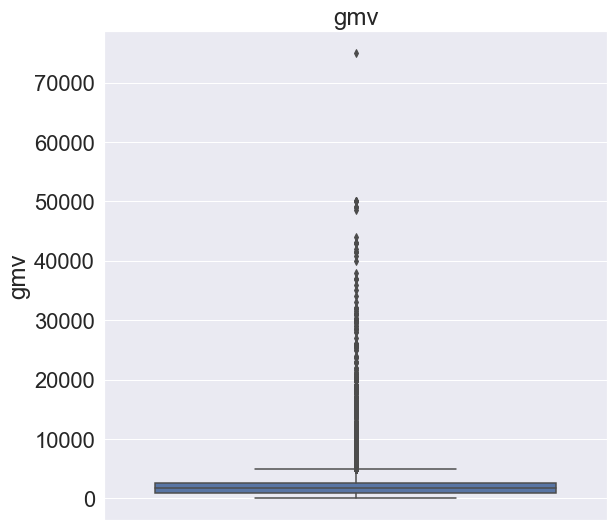

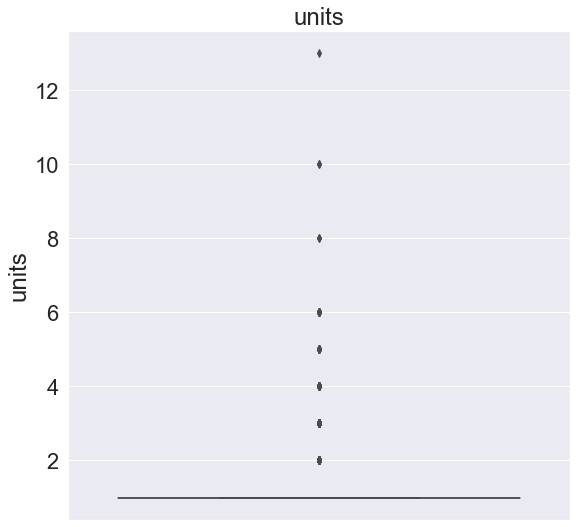

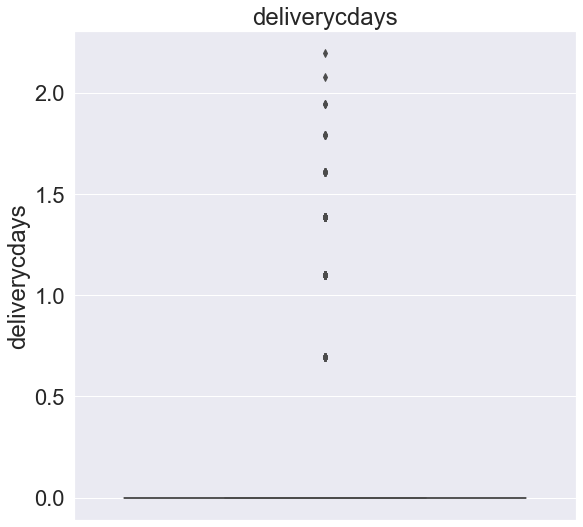

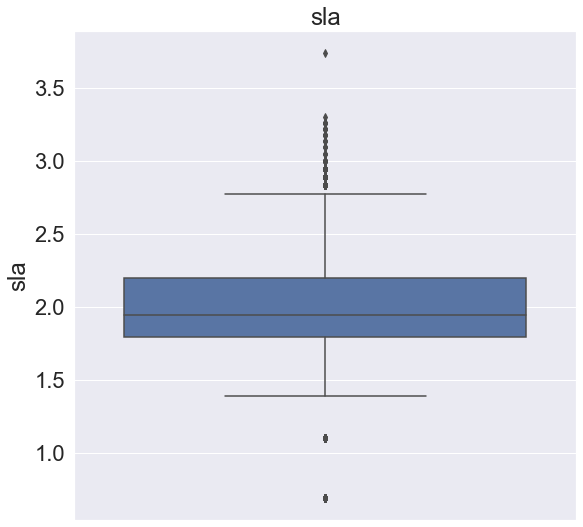

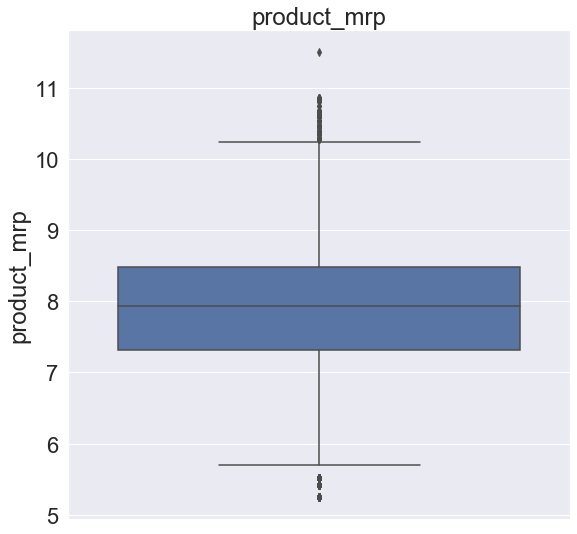

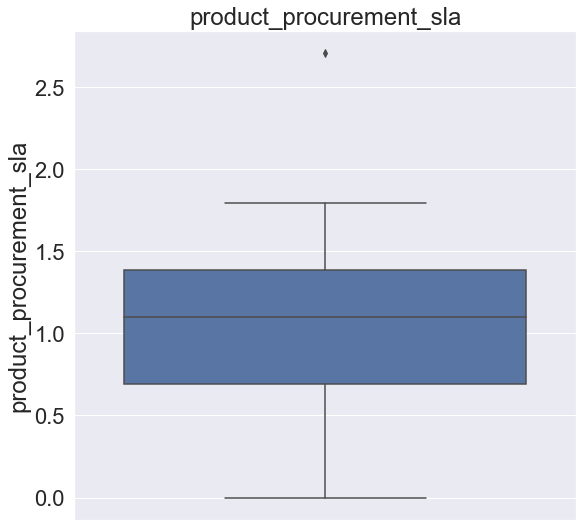

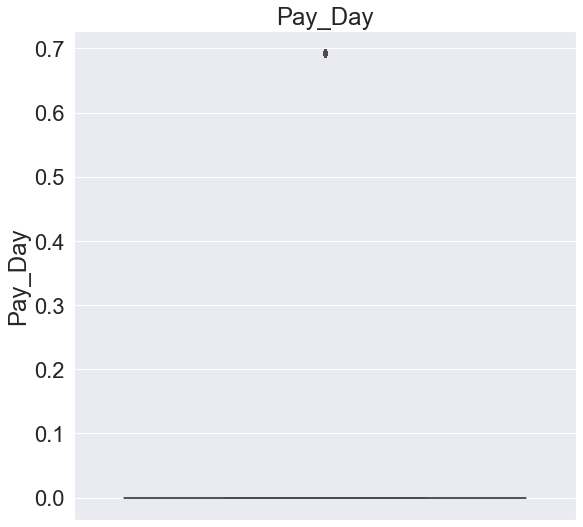

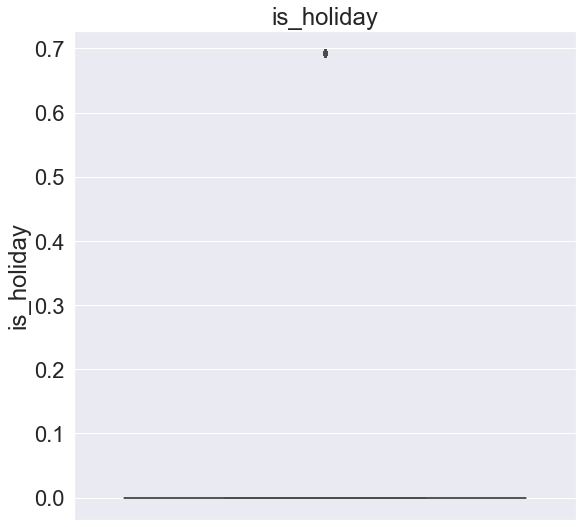

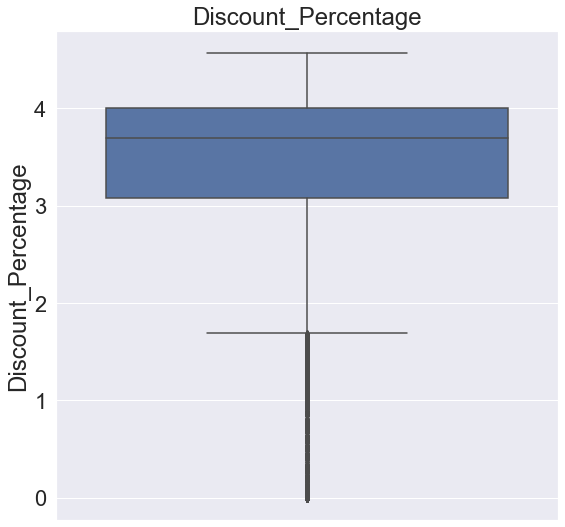

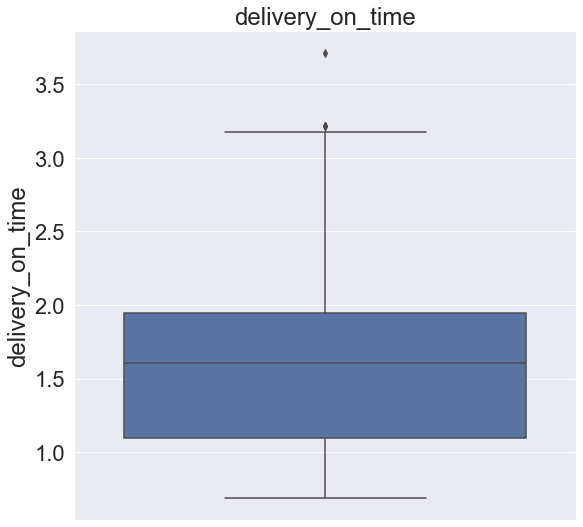

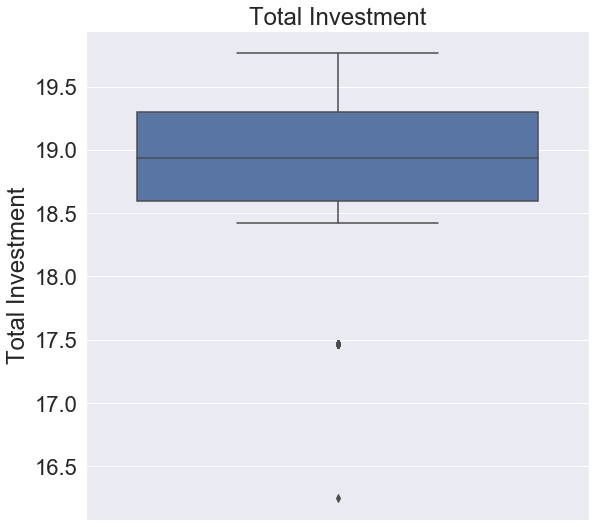

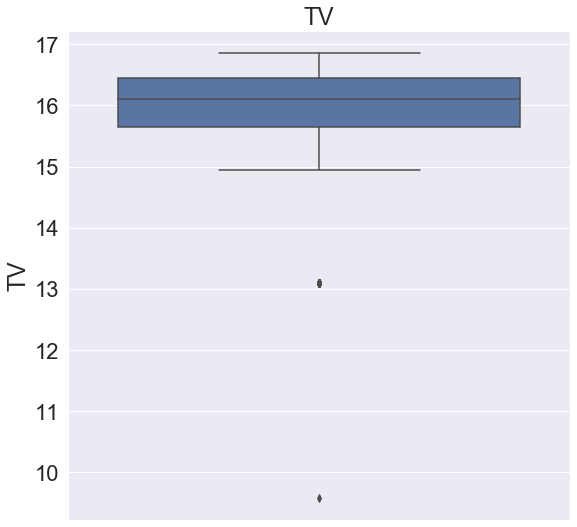

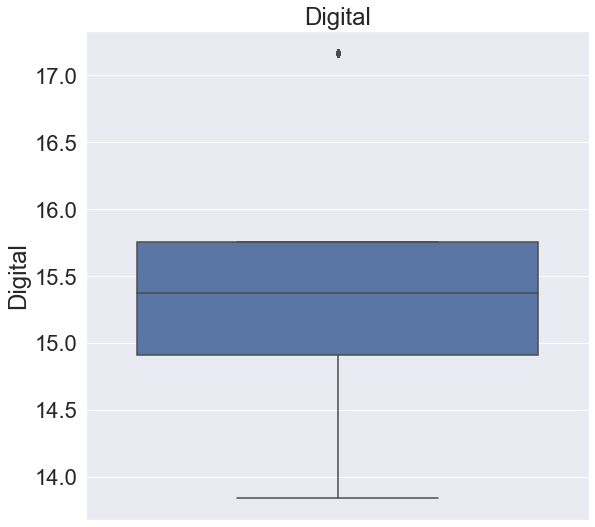

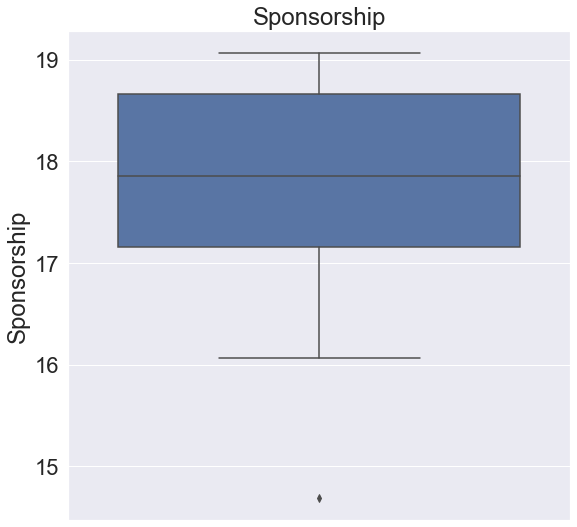

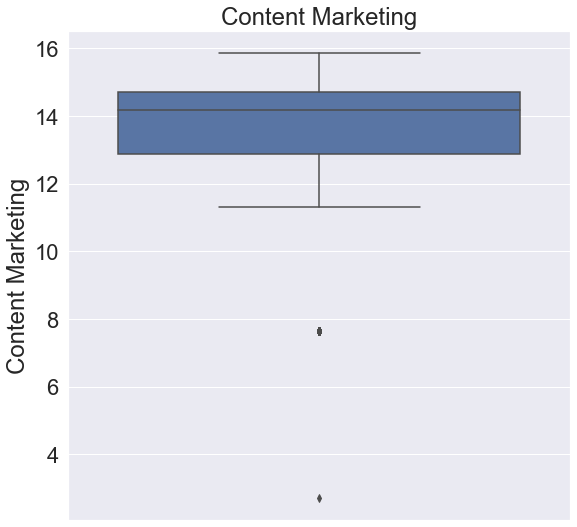

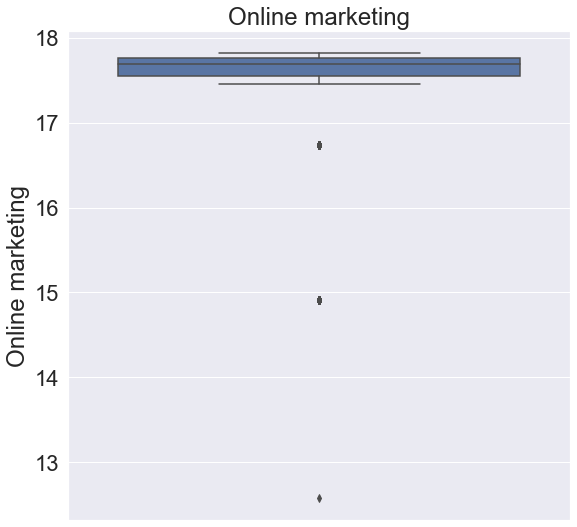

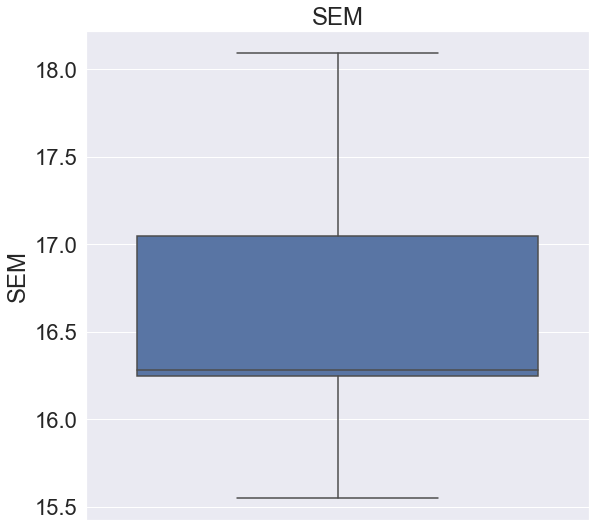

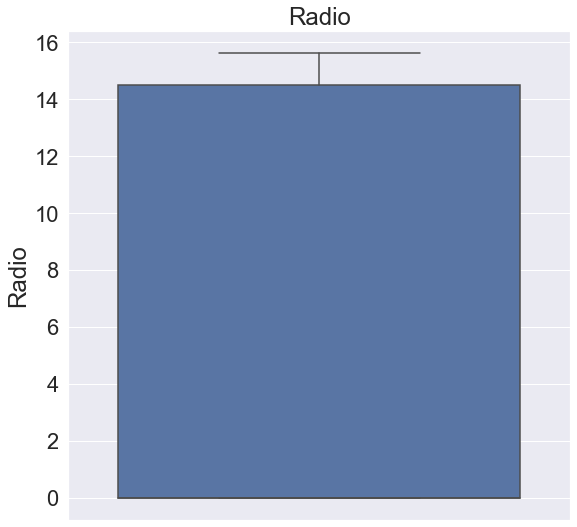

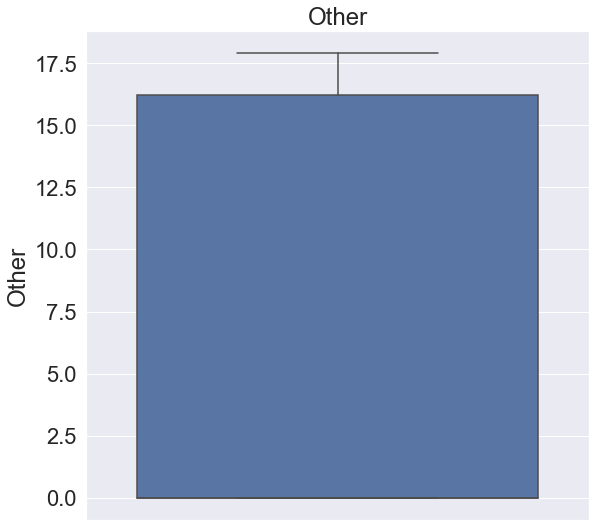

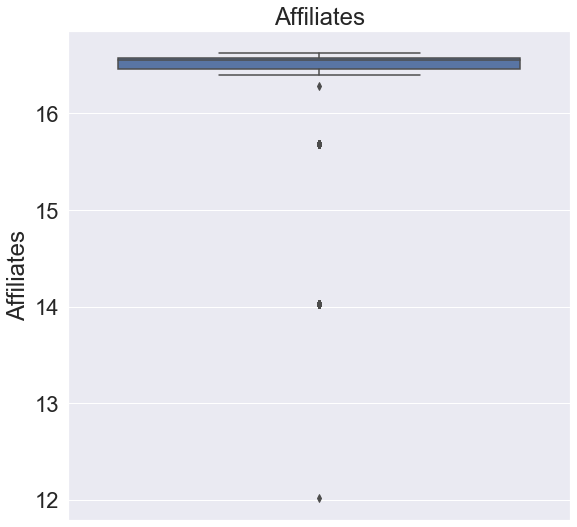

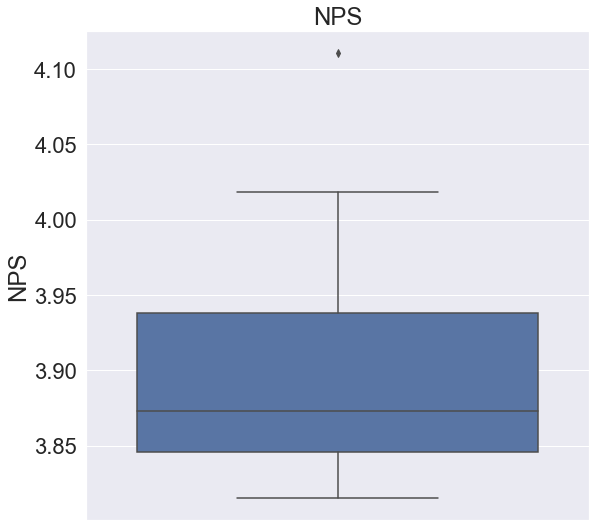

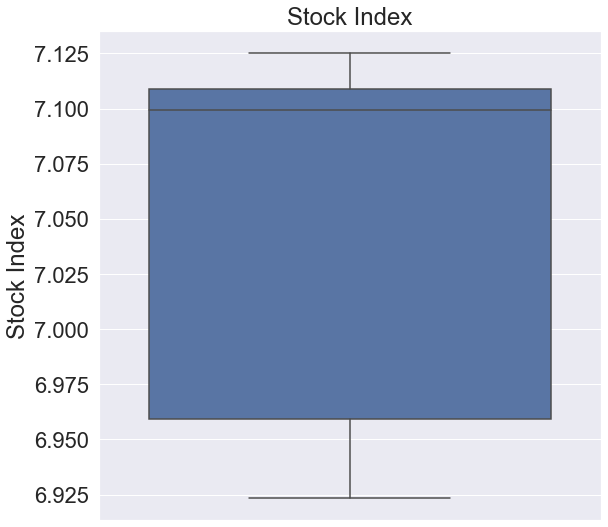

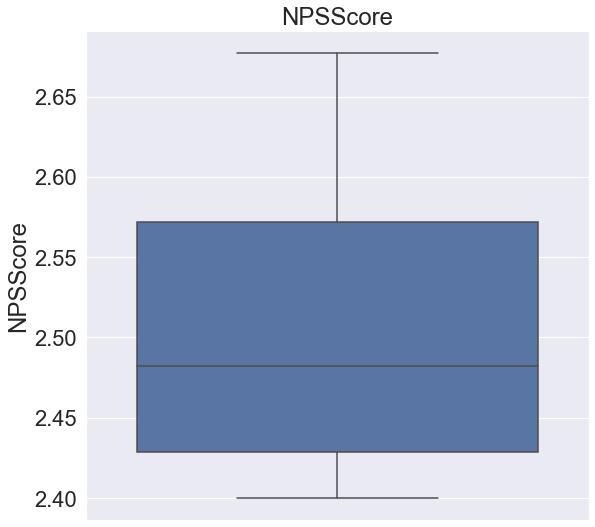

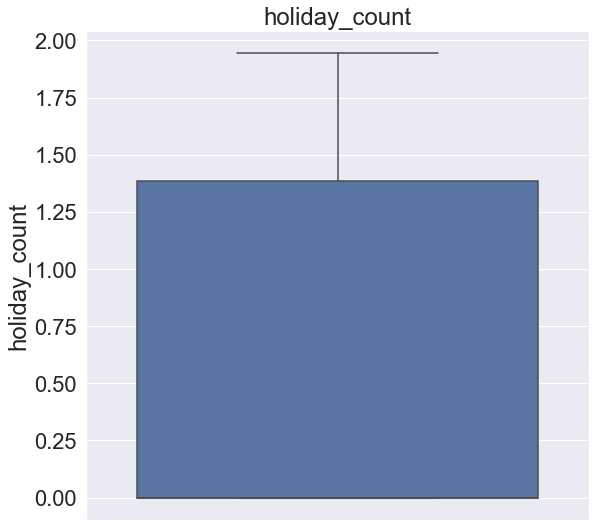

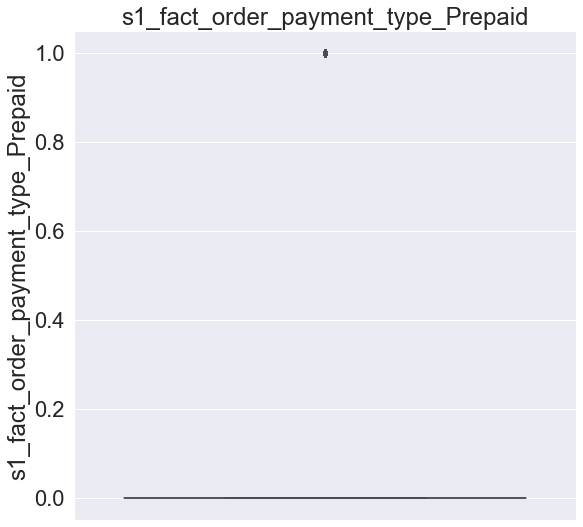

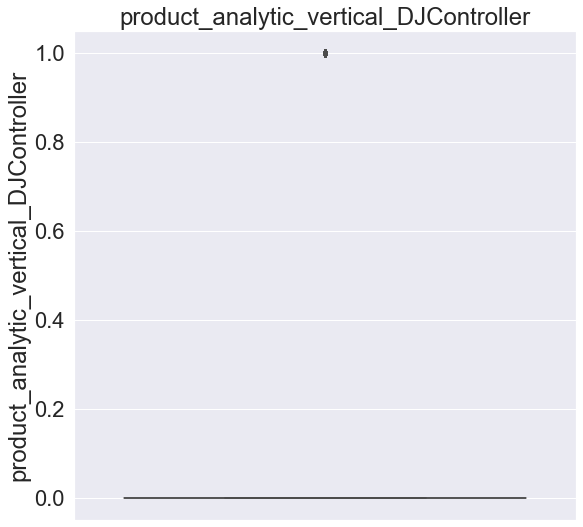

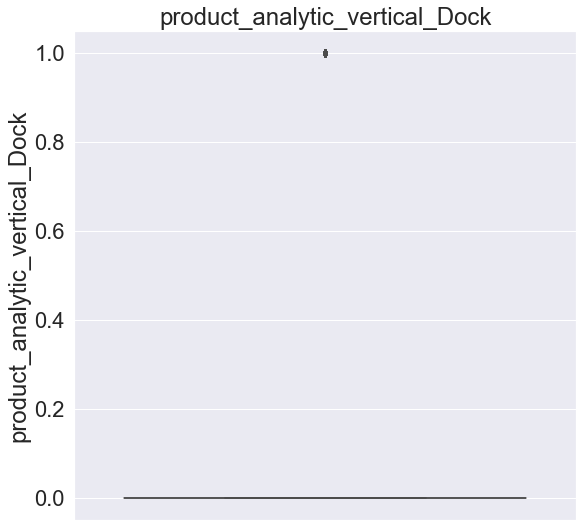

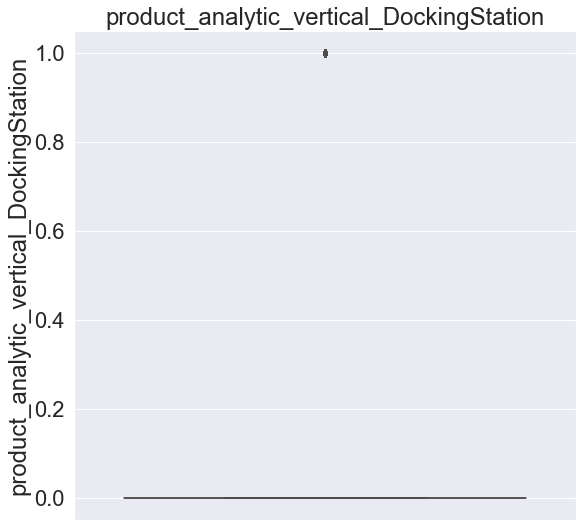

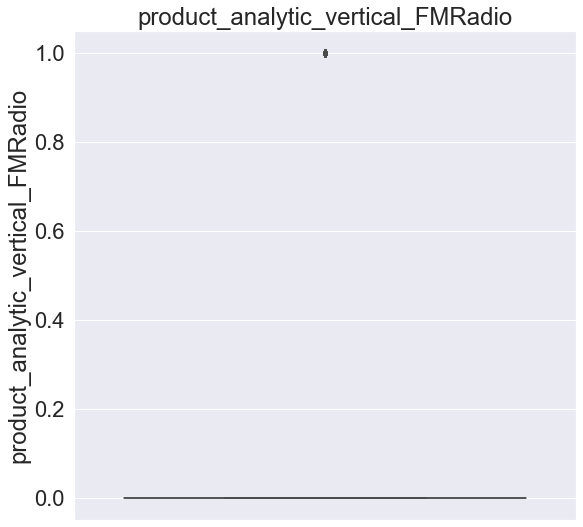

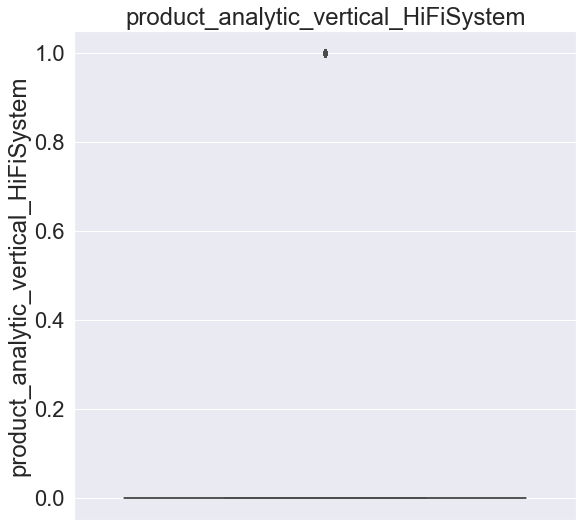

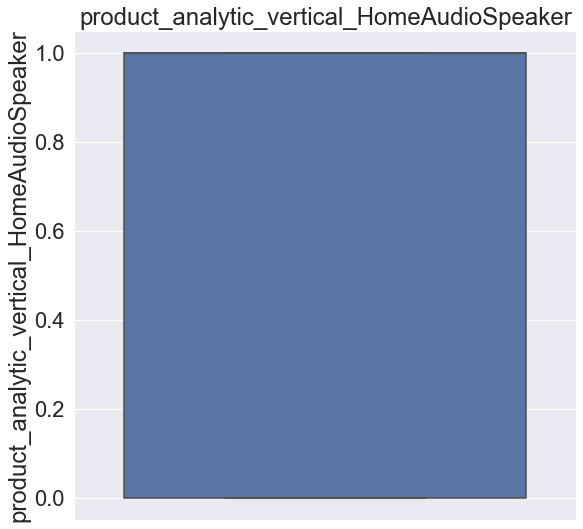

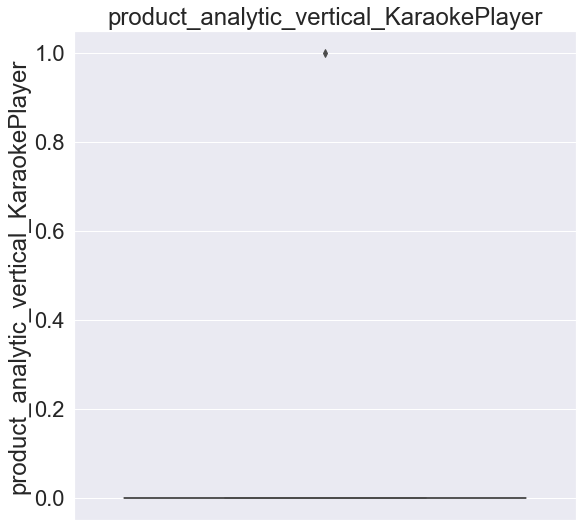

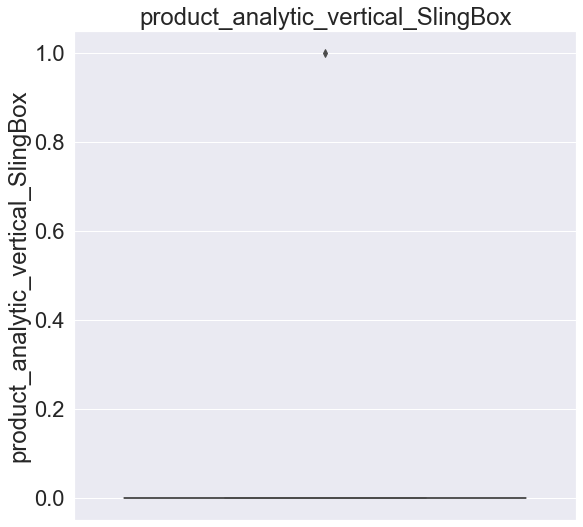

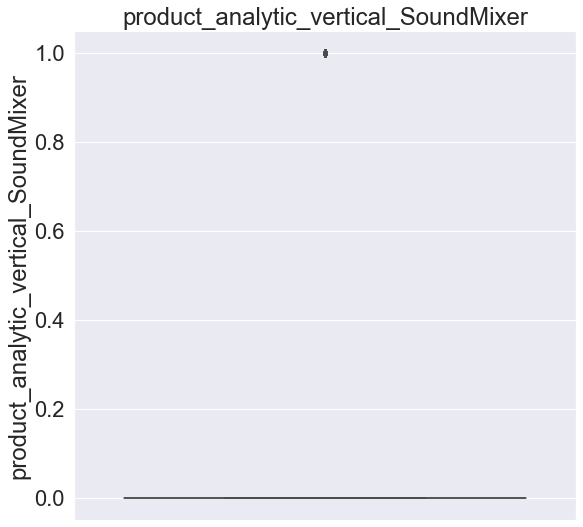

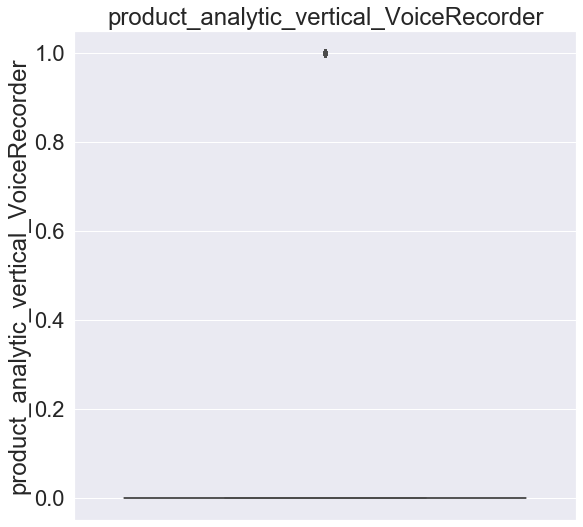

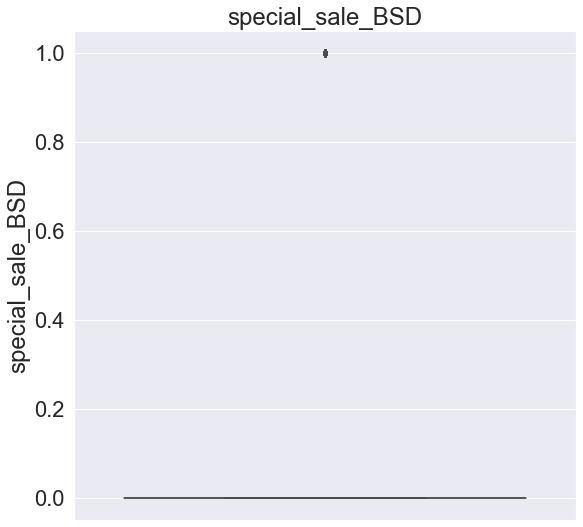

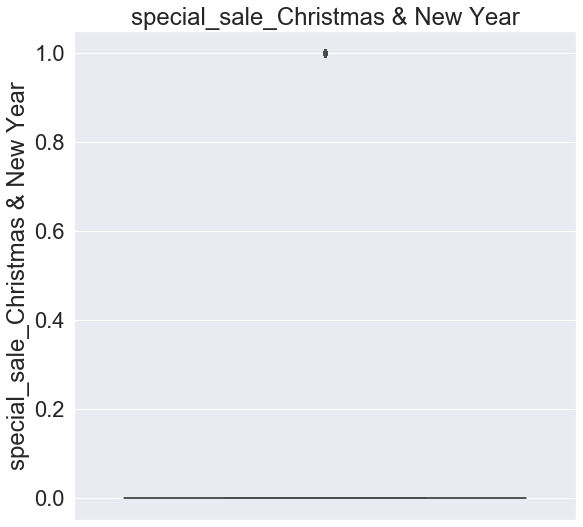

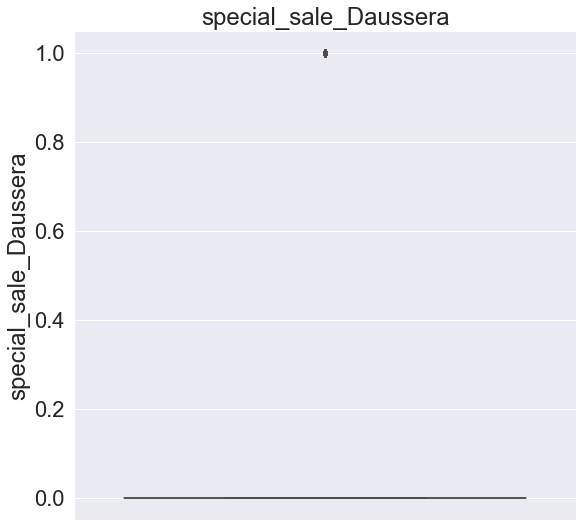

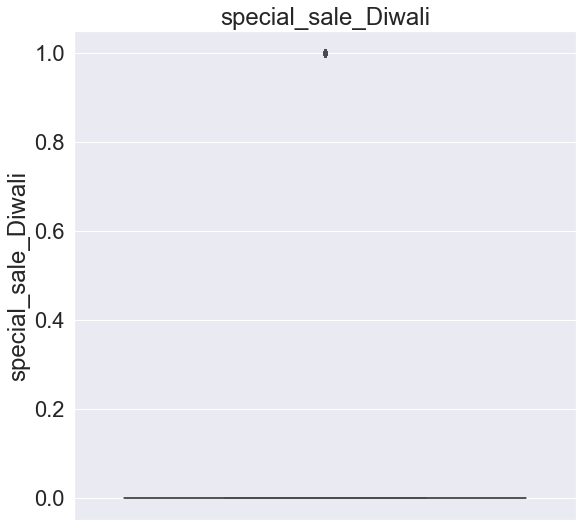

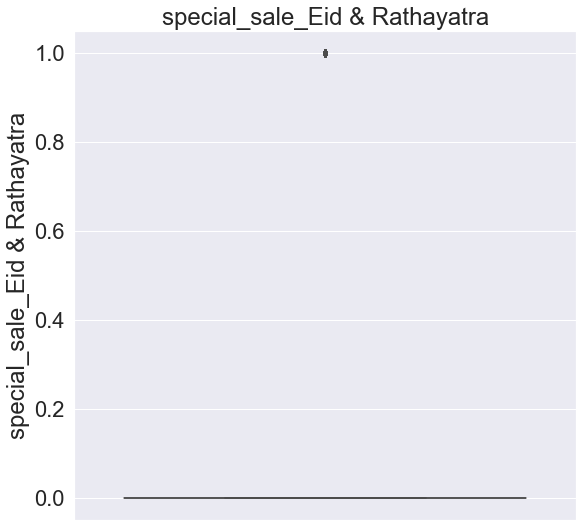

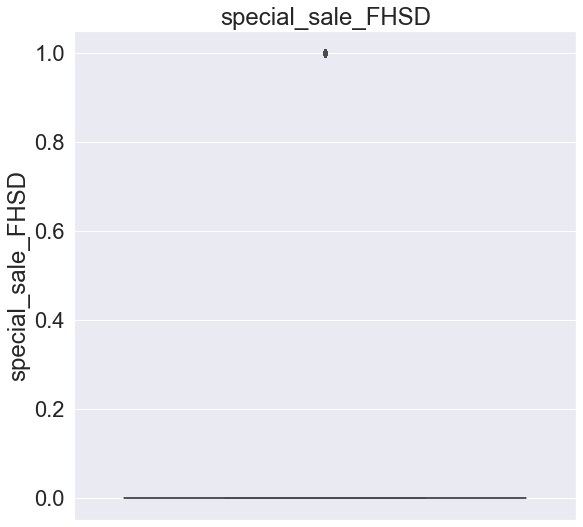

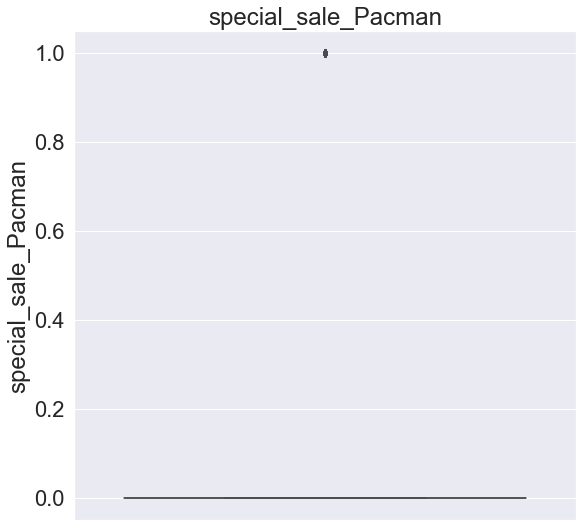

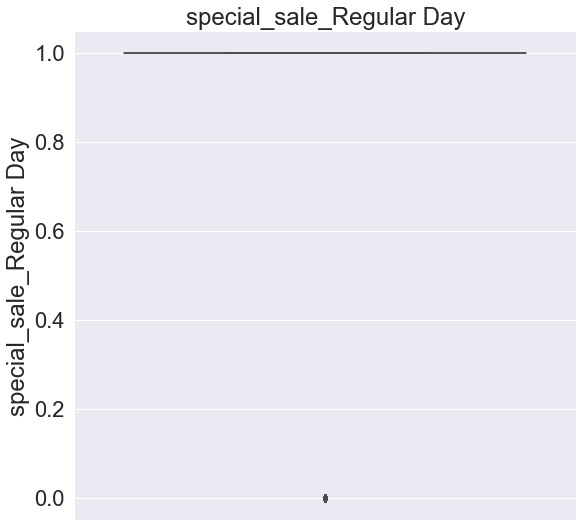

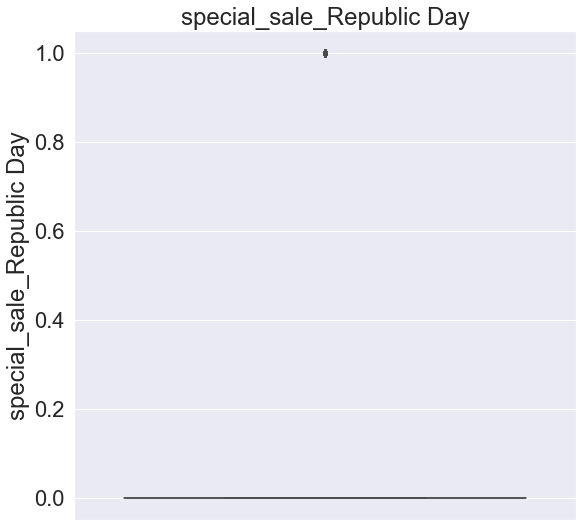

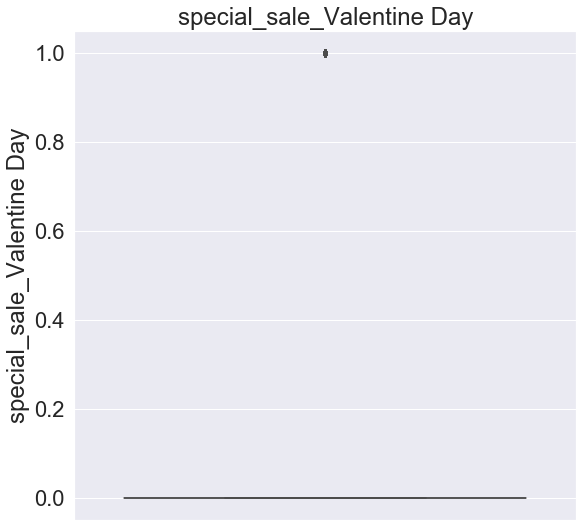

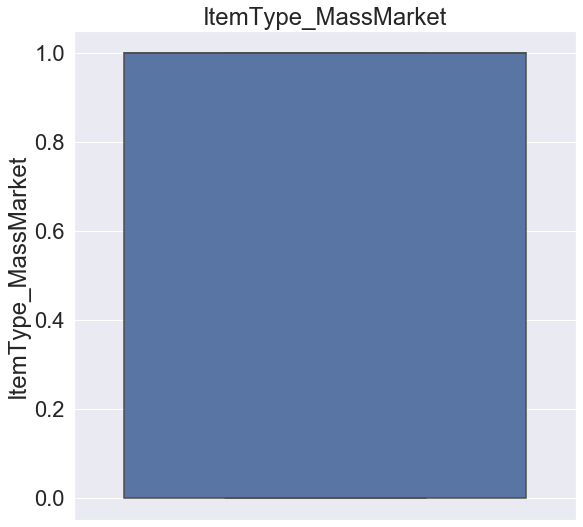

In [470]:
for col in list(home_audio.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=home_audio, y=col).set_title(col)
    

In [640]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [643]:
home_audio = remove_outlier(home_audio, 'gmv')
home_audio.shape

(59374, 46)

In [644]:
home_audio = remove_outlier(home_audio, 'sla')
home_audio.shape

(57929, 46)

In [645]:
home_audio = remove_outlier(home_audio, 'Discount_Percentage')
home_audio.shape

(55130, 46)

In [646]:
# Import the required library

from sklearn.model_selection import train_test_split

In [647]:
df_train, df_test = train_test_split(home_audio, train_size=0.7, test_size=0.3, random_state=100)

In [648]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [649]:
scaler = MinMaxScaler()


In [309]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0.00,2.30,8.92,1.79,0.00,0.69,2.87,1.61,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0.00,2.30,8.92,1.79,0.00,0.00,2.27,1.61,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0.00,1.95,8.92,1.79,0.00,0.00,2.27,0.69,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0.00,1.95,8.92,1.79,0.00,0.69,2.46,0.69,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0.00,1.95,8.92,1.79,0.00,0.00,2.20,0.69,...,0,0,0,0,0,0,1,0,0,0


In [650]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in home_audio.columns:
    if col not in dum_cols:
        varlist.append(col)

In [651]:
varlist

['gmv',
 'units',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'Discount_Percentage',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'Stock Index',
 'NPSScore',
 'holiday_count']

In [652]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [653]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
8004,0.50,0.00,0.00,0.79,0.59,0.61,0.00,0.00,0.80,0.77,...,0,0,0,0,0,0,1,0,0,0
21087,0.50,0.00,0.00,0.16,0.59,0.61,0.00,0.00,0.80,0.19,...,0,0,0,0,0,0,1,0,0,0
30492,0.30,0.00,0.00,0.50,0.39,0.39,0.00,0.69,0.50,0.60,...,1,0,0,0,0,0,0,0,0,1
6822,0.63,0.00,0.00,0.50,0.63,1.00,0.00,0.00,0.78,0.19,...,0,0,0,0,0,0,1,0,0,0
52490,0.13,0.00,0.00,0.73,0.30,0.61,0.00,0.69,0.72,0.72,...,0,0,0,0,1,0,0,0,0,1


In [654]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [655]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [656]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [657]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.12987008e+00  2.53251421e-02 -2.05579877e-02  1.10499945e+00
  2.62529183e-02  4.20831874e-03 -1.82285181e-03 -3.08116565e-01
  4.18646564e-02  2.44739025e+10 -1.50824602e+10  2.31463639e+10
 -1.05257093e+10 -1.94013881e+10  7.86719543e+09 -2.50784831e+10
  8.97020191e+10 -9.09530602e+10  2.17209844e+10  2.59317954e+10
  7.30173671e+07 -2.53953895e+10 -1.49334128e-04  4.46507383e-03
  5.67650135e+07 -3.56429810e-02  3.13846022e-02 -4.08605960e-02
  2.49042057e-02 -2.30276731e-02  1.58355074e+07  1.18154441e-01
  1.58777191e-01 -1.65254171e-02  1.09964137e-02  4.39864969e-03
  4.24988435e-03  6.79959032e-03  3.26018555e-03  8.07653272e-03
  8.26168040e-03  6.11967850e-03  1.40795505e-02  1.13428706e-02
 -1.44368531e-01]
-7782422182.963085


In [658]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True False False  True False False False  True False  True  True  True
  True  True False  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[ 1  9 10  1  8 20 30  1  7  1  1  1  1  1 13  1  1  1  1  1  1  1 31 18
 14 12  5 11  6 15 19  3  2 16 21 27 28 26 29 23 24 25 17 22  4]


In [659]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,Discount_Percentage,Total Investment,TV,Digital,Sponsorship,Content Marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore
8004,1.00,0.00,0.59,0.80,1.00,0.94,1.00,1.00,1.00,1.00,0.00,0.00,0.99,0.00,0.87,0.00
21087,1.00,0.00,0.59,0.80,0.67,0.90,0.32,0.60,0.77,0.30,0.00,0.00,0.98,0.19,0.96,0.30
30492,1.00,0.00,0.39,0.50,0.87,0.93,0.57,0.91,0.91,0.59,0.00,0.00,0.98,0.10,0.11,0.10
6822,1.00,0.00,0.63,0.78,0.67,0.90,0.32,0.60,0.77,0.30,0.00,0.00,0.98,0.19,0.96,0.30
52490,1.00,0.00,0.30,0.72,0.66,0.83,0.45,0.56,0.87,0.29,0.00,0.00,0.99,0.42,0.92,0.64


In [660]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.896e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:20:22   Log-Likelihood:                 44904.
No. Observations:               38591   AIC:                        -8.978e+04
Df Residuals:                   38577   BIC:                        -8.966e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0138    

In [496]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [497]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [498]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Total Investment,inf
5,TV,inf
6,Digital,inf
7,Sponsorship,inf
8,Content Marketing,inf
9,SEM,inf
10,Radio,inf
11,Other,inf
12,Affiliates,inf
13,NPS,inf


In [499]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.896e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:33:52   Log-Likelihood:                 44904.
No. Observations:               38591   AIC:                        -8.978e+04
Df Residuals:                   38577   BIC:                        -8.966e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0388      0.430      0.090      0.928      -0.804       0.882
units                   1.1411      0.024     47.977      0.000       1.094       1.188
product_mrp             1.4357      0.003    492.039      0.000       1.430       1.441
Discount_Percentage    -0.3861      0.002   -194.388      0.000      -0.390      -0.382
TV                      0.0465      0.041      1.130      0.258      -0.034       0.127
Digital                -0.0544      0.358     -0.152      0.879      -0.756       0.647
Sponsorship             0.0497      0.119      0.418      0.676      -0.183       0.283
Content Marketing       0.0723      0.293      0.247      0.805      -0.503       0.647
SEM                    -0.0190      0.491     -0.039      0.969      -0.980       0.942
Radio                  -0.0660      0.924     -0.072      0.943      -1.876       1.744
Other                   0.0611      1.003      0.061      0.951      -1.906       2.028
Affiliates             -0.1829      0.367     -0.499      0.618      -0.902       0.536
NPS                    -0.0986      1.325     -0.074      0.941      -2.695       2.497
Stock Index             0.0127      0.071      0.179      0.858      -0.126       0.151
NPSScore                0.0482      1.141      0.042      0.966      -2.189       2.285
==============================================================================
Omnibus:                     6869.295   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62451.452
Skew:                           0.595   Prob(JB):                         0.00
Kurtosis:                       9.118   Cond. No.                     6.32e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.37e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [500]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,TV,inf
5,Digital,inf
6,Sponsorship,inf
7,Content Marketing,inf
8,SEM,inf
9,Radio,inf
10,Other,inf
11,Affiliates,inf
12,NPS,inf
13,Stock Index,inf


In [501]:
X_train_rfe1 = X_train_rfe1.drop('TV', axis=1)
lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.896e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:34:07   Log-Likelihood:                 44904.
No. Observations:               38591   AIC:                        -8.978e+04
Df Residuals:                   38577   BIC:                        -8.966e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0009      0.403     -0.002      0.998      -0.791       0.789
units                   1.1411      0.024     47.977      0.000       1.094       1.188
product_mrp             1.4357      0.003    492.039      0.000       1.430       1.441
Discount_Percentage    -0.3861      0.002   -194.388      0.000      -0.390      -0.382
Digital                -0.0455      0.351     -0.130      0.897      -0.734       0.643
Sponsorship             0.0439      0.115      0.382      0.702      -0.181       0.269
Content Marketing       0.1349      0.256      0.528      0.598      -0.366       0.636
SEM                    -0.0554      0.466     -0.119      0.905      -0.968       0.857
Radio                  -0.3190      1.110     -0.287      0.774      -2.494       1.856
Other                   0.2971      1.176      0.253      0.801      -2.008       2.602
Affiliates             -0.1391      0.334     -0.416      0.677      -0.794       0.516
NPS                     0.0737      1.207      0.061      0.951      -2.293       2.440
Stock Index             0.0254      0.062      0.406      0.685      -0.097       0.148
NPSScore               -0.0980      1.042     -0.094      0.925      -2.140       1.944
==============================================================================
Omnibus:                     6869.295   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62451.452
Skew:                           0.595   Prob(JB):                         0.00
Kurtosis:                       9.118   Cond. No.                     1.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [502]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
9,Other,"1,775,261.38"
8,Radio,"1,529,208.52"
0,const,"1,096,001.09"
13,NPSScore,"430,424.14"
11,NPS,"419,239.00"
7,SEM,"129,630.01"
4,Digital,"78,890.42"
10,Affiliates,"21,052.35"
6,Content Marketing,"13,427.40"
5,Sponsorship,"5,038.20"


In [503]:
X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 2.055e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:34:35   Log-Likelihood:                 44904.
No. Observations:               38591   AIC:                        -8.978e+04
Df Residuals:                   38578   BIC:                        -8.967e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1012      0.068     -1.478      0.139      -0.235       0.033
units                   1.1411      0.024     47.978      0.000       1.094       1.188
product_mrp             1.4357      0.003    492.058      0.000       1.430       1.441
Discount_Percentage    -0.3861      0.002   -194.397      0.000      -0.390      -0.382
Digital                 0.0428      0.035      1.219      0.223      -0.026       0.112
Sponsorship             0.0151      0.013      1.138      0.255      -0.011       0.041
Content Marketing       0.1954      0.090      2.164      0.030       0.018       0.372
SEM                    -0.1715      0.074     -2.316      0.021      -0.317      -0.026
Radio                  -0.0387      0.019     -2.069      0.039      -0.075      -0.002
Affiliates             -0.0549      0.023     -2.352      0.019      -0.101      -0.009
NPS                     0.3734      0.225      1.663      0.096      -0.067       0.814
Stock Index             0.0406      0.017      2.439      0.015       0.008       0.073
NPSScore               -0.3567      0.191     -1.864      0.062      -0.732       0.018
==============================================================================
Omnibus:                     6869.141   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62449.180
Skew:                           0.595   Prob(JB):                         0.00
Kurtosis:                       9.117   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [504]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,"31,657.13"
12,NPSScore,"14,531.58"
10,NPS,"14,505.70"
7,SEM,"3,281.76"
6,Content Marketing,"1,673.36"
4,Digital,787.98
8,Radio,433.48
11,Stock Index,280.45
9,Affiliates,102.84
5,Sponsorship,66.92


In [505]:
X_train_rfe1 = X_train_rfe1.drop('NPSScore', axis=1)
lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 2.241e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:35:05   Log-Likelihood:                 44903.
No. Observations:               38591   AIC:                        -8.978e+04
Df Residuals:                   38579   BIC:                        -8.968e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0256      0.008      3.376      0.001       0.011       0.040
units                   1.1410      0.024     47.975      0.000       1.094       1.188
product_mrp             1.4359      0.003    492.239      0.000       1.430       1.442
Discount_Percentage    -0.3861      0.002   -194.433      0.000      -0.390      -0.382
Digital                -0.0216      0.006     -3.421      0.001      -0.034      -0.009
Sponsorship             0.0375      0.006      6.759      0.000       0.027       0.048
Content Marketing       0.0297      0.016      1.877      0.061      -0.001       0.061
SEM                    -0.0347      0.010     -3.584      0.000      -0.054      -0.016
Radio                  -0.0040      0.002     -2.483      0.013      -0.007      -0.001
Affiliates             -0.0848      0.017     -4.990      0.000      -0.118      -0.051
NPS                    -0.0449      0.008     -5.640      0.000      -0.060      -0.029
Stock Index             0.0098      0.002      4.858      0.000       0.006       0.014
==============================================================================
Omnibus:                     6872.500   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62378.327
Skew:                           0.596   Prob(JB):                         0.00
Kurtosis:                       9.113   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [506]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,388.45
7,SEM,56.02
9,Affiliates,54.45
6,Content Marketing,51.55
4,Digital,25.42
10,NPS,18.19
5,Sponsorship,11.74
11,Stock Index,4.13
8,Radio,3.16
2,product_mrp,1.11


In [507]:
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 2.464e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:35:37   Log-Likelihood:                 44896.
No. Observations:               38591   AIC:                        -8.977e+04
Df Residuals:                   38580   BIC:                        -8.968e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0063      0.005      1.181      0.238      -0.004       0.017
units                   1.1417      0.024     47.996      0.000       1.095       1.188
product_mrp             1.4359      0.003    492.165      0.000       1.430       1.442
Discount_Percentage    -0.3863      0.002   -194.505      0.000      -0.390      -0.382
Digital                -0.0329      0.005     -6.019      0.000      -0.044      -0.022
Sponsorship             0.0300      0.005      5.842      0.000       0.020       0.040
Content Marketing      -0.0056      0.012     -0.452      0.651      -0.030       0.019
Radio                  -0.0041      0.002     -2.563      0.010      -0.007      -0.001
Affiliates             -0.0415      0.012     -3.471      0.001      -0.065      -0.018
NPS                    -0.0206      0.004     -4.946      0.000      -0.029      -0.012
Stock Index             0.0057      0.002      3.437      0.001       0.002       0.009
==============================================================================
Omnibus:                     6865.289   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62356.449
Skew:                           0.594   Prob(JB):                         0.00
Kurtosis:                       9.113   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [508]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,192.64
6,Content Marketing,31.58
8,Affiliates,26.97
4,Digital,19.07
5,Sponsorship,10.10
9,NPS,4.97
7,Radio,3.16
10,Stock Index,2.82
2,product_mrp,1.11
3,Discount_Percentage,1.11


In [509]:
X_train_rfe1 = X_train_rfe1.drop('Content Marketing', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 2.738e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:36:00   Log-Likelihood:                 44896.
No. Observations:               38591   AIC:                        -8.977e+04
Df Residuals:                   38581   BIC:                        -8.969e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0059      0.005      1.123      0.261      -0.004       0.016
units                   1.1417      0.024     47.996      0.000       1.095       1.188
product_mrp             1.4358      0.003    492.450      0.000       1.430       1.442
Discount_Percentage    -0.3863      0.002   -194.508      0.000      -0.390      -0.382
Digital                -0.0348      0.003    -10.366      0.000      -0.041      -0.028
Sponsorship             0.0315      0.004      7.826      0.000       0.024       0.039
Radio                  -0.0043      0.001     -2.925      0.003      -0.007      -0.001
Affiliates             -0.0465      0.005    -10.106      0.000      -0.056      -0.037
NPS                    -0.0196      0.004     -5.417      0.000      -0.027      -0.013
Stock Index             0.0060      0.002      3.861      0.000       0.003       0.009
==============================================================================
Omnibus:                     6864.973   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62336.244
Skew:                           0.594   Prob(JB):                         0.00
Kurtosis:                       9.112   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [510]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,187.77
4,Digital,7.21
5,Sponsorship,6.18
7,Affiliates,3.99
8,NPS,3.78
6,Radio,2.74
9,Stock Index,2.45
2,product_mrp,1.11
3,Discount_Percentage,1.11
1,units,1.00


In [511]:
X_train_rfe1 = X_train_rfe1.drop('Digital', axis=1)
lm_8 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 3.071e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:36:21   Log-Likelihood:                 44842.
No. Observations:               38591   AIC:                        -8.967e+04
Df Residuals:                   38582   BIC:                        -8.959e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0147      0.005     -3.002      0.003      -0.024      -0.005
units                   1.1423      0.024     47.958      0.000       1.096       1.189
product_mrp             1.4372      0.003    492.748      0.000       1.431       1.443
Discount_Percentage    -0.3868      0.002   -194.537      0.000      -0.391      -0.383
Sponsorship            -0.0028      0.002     -1.245      0.213      -0.007       0.002
Radio                  -0.0023      0.001     -1.559      0.119      -0.005       0.001
Affiliates             -0.0183      0.004     -4.918      0.000      -0.026      -0.011
NPS                    -0.0047      0.003     -1.409      0.159      -0.011       0.002
Stock Index          9.372e-05      0.001      0.065      0.948      -0.003       0.003
==============================================================================
Omnibus:                     6869.601   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61380.252
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       9.061   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [512]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,161.08
7,NPS,3.18
5,Radio,2.70
6,Affiliates,2.59
8,Stock Index,2.12
4,Sponsorship,1.99
2,product_mrp,1.11
3,Discount_Percentage,1.11
1,units,1.00


In [513]:
X_train_rfe1 = X_train_rfe1.drop('Stock Index', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 3.509e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:36:52   Log-Likelihood:                 44842.
No. Observations:               38591   AIC:                        -8.967e+04
Df Residuals:                   38583   BIC:                        -8.960e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0146      0.005     -3.059      0.002      -0.024      -0.005
units                   1.1423      0.024     47.959      0.000       1.096       1.189
product_mrp             1.4372      0.003    492.769      0.000       1.431       1.443
Discount_Percentage    -0.3868      0.002   -194.542      0.000      -0.391      -0.383
Sponsorship            -0.0029      0.002     -1.317      0.188      -0.007       0.001
Radio                  -0.0024      0.001     -2.313      0.021      -0.004      -0.000
Affiliates             -0.0182      0.004     -4.964      0.000      -0.025      -0.011
NPS                    -0.0047      0.003     -1.407      0.159      -0.011       0.002
==============================================================================
Omnibus:                     6869.592   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61378.962
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       9.061   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [514]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,153.75
7,NPS,3.18
6,Affiliates,2.54
4,Sponsorship,1.83
5,Radio,1.30
2,product_mrp,1.11
3,Discount_Percentage,1.11
1,units,1.00


In [515]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_10 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.094e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:37:48   Log-Likelihood:                 44841.
No. Observations:               38591   AIC:                        -8.967e+04
Df Residuals:                   38584   BIC:                        -8.961e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0176      0.004     -4.182      0.000      -0.026      -0.009
units                   1.1424      0.024     47.964      0.000       1.096       1.189
product_mrp             1.4372      0.003    492.775      0.000       1.431       1.443
Discount_Percentage    -0.3868      0.002   -194.556      0.000      -0.391      -0.383
Radio                  -0.0019      0.001     -1.967      0.049      -0.004   -7.09e-06
Affiliates             -0.0179      0.004     -4.886      0.000      -0.025      -0.011
NPS                    -0.0025      0.003     -0.875      0.382      -0.008       0.003
==============================================================================
Omnibus:                     6865.321   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61415.391
Skew:                           0.599   Prob(JB):                         0.00
Kurtosis:                       9.063   Cond. No.                         99.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [516]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,119.23
5,Affiliates,2.53
6,NPS,2.42
4,Radio,1.13
2,product_mrp,1.11
3,Discount_Percentage,1.11
1,units,1.00


In [517]:
X_train_rfe1 = X_train_rfe1.drop('NPS', axis=1)
lm_11 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.913e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:38:16   Log-Likelihood:                 44841.
No. Observations:               38591   AIC:                        -8.967e+04
Df Residuals:                   38585   BIC:                        -8.962e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0205      0.003     -7.953      0.000      -0.026      -0.015
units                   1.1424      0.024     47.963      0.000       1.096       1.189
product_mrp             1.4373      0.003    492.923      0.000       1.432       1.443
Discount_Percentage    -0.3867      0.002   -194.666      0.000      -0.391      -0.383
Radio                  -0.0021      0.001     -2.270      0.023      -0.004      -0.000
Affiliates             -0.0155      0.002     -6.531      0.000      -0.020      -0.011
==============================================================================
Omnibus:                     6860.405   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61422.578
Skew:                           0.598   Prob(JB):                         0.00
Kurtosis:                       9.064   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [518]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,44.77
2,product_mrp,1.11
3,Discount_Percentage,1.11
4,Radio,1.05
5,Affiliates,1.05
1,units,1.00


In [519]:
# Predicting using the 12th model
y_train_price = lm_11.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

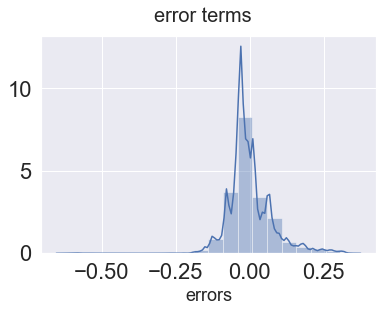

In [520]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)  

In [521]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [522]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [523]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [524]:
col1

Index(['units', 'product_mrp', 'Discount_Percentage', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'SEM', 'Radio', 'Other',
       'Affiliates', 'NPS', 'Stock Index', 'NPSScore'],
      dtype='object')

In [525]:
# Let's now drop the variables we had manually eliminated as well
# X_test_rfe2 = X_test_rfe2.drop(['SEM', 'Total Investment', 'Online marketing', 'Sponsorship', 'Affiliates', 'TV', 
#                                'Other', 'Digital'], axis = 1)

X_test_rfe2 = X_test_rfe2.drop(['Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Stock Index',
       'SEM', 'Other', 'NPS', 'NPSScore'], axis = 1)


In [526]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16539 entries, 4792 to 53988
Data columns (total 6 columns):
const                  16539 non-null float64
units                  16539 non-null float64
product_mrp            16539 non-null float64
Discount_Percentage    16539 non-null float64
Radio                  16539 non-null float64
Affiliates             16539 non-null float64
dtypes: float64(6)
memory usage: 904.5 KB


In [527]:
# Making predictions
y_pred = lm_11.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

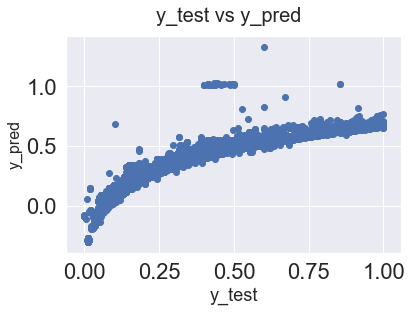

In [528]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [ ]:
### OLD SECTION

In [533]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [534]:
regr.score(X_test, y_test)

-4667466008873.3955

In [535]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)  

Cross Validation scores:  [ 9.21544006e-01  9.23222625e-01 -3.92171886e+10 -1.10338745e+19
  9.19906937e-01]
Mean and std deviation:  -2.2067749049544197e+18 4.413549790300245e+18


-4667466008873.3955

In [536]:
accuracy

-31065266001.81586

In [661]:
scores

array([ 9.23588786e-01,  9.21425778e-01,  9.23304766e-01, -1.22410982e+15,
       -2.83487268e+17])

### Different types of regression

In [662]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9218124894190671
0.1


In [663]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020C1D98E508>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.92181245823104
0.08585395991951461


In [664]:
# model with optimal alpha
lm = Ridge(alpha=0.1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9221409343441738
0.9170754662029187


In [665]:
rmse = sqrt(mean_squared_error(y_test_pred, y_test))

print(rmse)

0.05883382152501465
